In [ ]:
# Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM)
#              to predict the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price.

In [1]:
# Install the libraries
!pip install numpy
!pip install pandas
!pip install pandas-datareader
!pip install yfinance
!pip install scikit-learn
!pip install keras
!pip install matplotlib
!pip install tensorflow
!pip install datetime

In [2]:
# Import the libraries
import tensorflow.compat.v1 as tf                # A library which is used for machine learning models.
tf.disable_v2_behavior()                         # Disables TensorFlow version 2 behavior and enables version 1.
tf.compat.v1.disable_eager_execution()           # Disables the TensorFlow eager execution mode.
import numpy as np                               # A library for numerical computing in Python.
import pandas as pd                              # A library for data manipulation and analysis in Python.
import pandas_datareader as web                  # A library for downloading financial data from various sources.
from pandas_datareader import data as pdr        # Alias for the pandas_datareader.data module.
import yfinance as yfin                          # A library for downloading financial data from Yahoo Finance.
from sklearn.preprocessing import MinMaxScaler   # A library for scaling numerical data.
from keras.models import Sequential              # A library for building neural network models.
from keras.layers import Dense, LSTM, Dropout    # Classes for defining layers in a neural network.
import matplotlib.pyplot as plt                  # A library for creating data visualizations in Python.

2023-03-31 22:38:01.794574: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
# Get the data using the yfinance library and the pandas-datareader API
import datetime 
yfin.pdr_override()
df = pdr.get_data_yahoo('AAPL', start='2019-01-01', end=datetime.date.today())

# Show the data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,38.047043,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.257278,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.719704,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.640186,219111200
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.319611,164101200
...,...,...,...,...,...,...
2023-03-24,158.860001,160.339996,157.850006,160.250000,160.250000,59196500
2023-03-27,159.940002,160.770004,157.869995,158.279999,158.279999,52390300
2023-03-28,157.970001,158.490005,155.979996,157.649994,157.649994,45992200


In [4]:
# Get the number of rows and columns in the data set
df.shape

(1069, 6)

<function matplotlib.pyplot.show(close=None, block=None)>

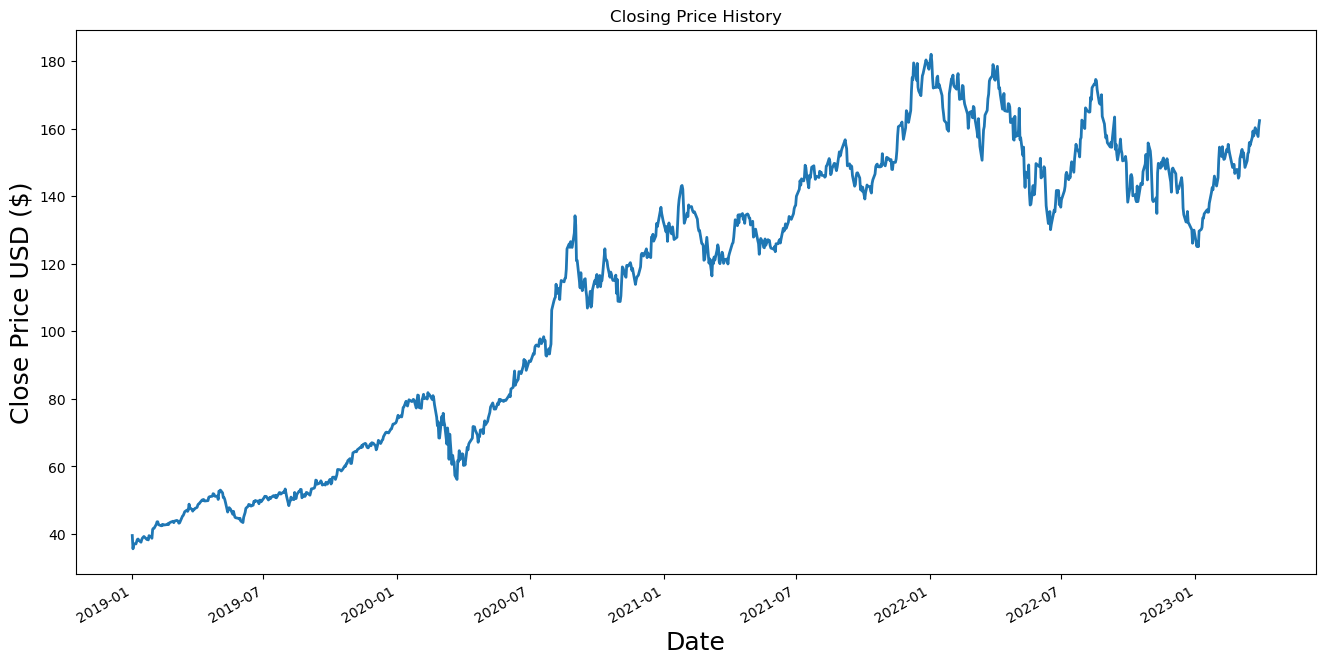

In [5]:
# Visualize the closing price history
df['Close'].plot(figsize=(16,8), linewidth=2)
plt.title('Closing Price History')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show

In [6]:
# Create a new numpy array with only the 'Close' column
dataset = df[['Close']].values

# Calculate the number of rows to use for training
training_data_len = int(len(dataset) * 0.8)

training_data_len

855

In [7]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02684987],
       [0.        ],
       [0.010361  ],
       ...,
       [0.83367755],
       [0.85498   ],
       [0.865836  ]])

In [8]:
# Create the training dataset

# Create the scaled training dataset
train_data=scaled_data[0:training_data_len, :]

# Split the data into x_train and y_train datasets
x_train = [] # contain the input features for the model
y_train = [] # contain the target values

# Loop through the training data, creating x_train and y_train datasets
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])  # Append the past 60 values to the x_train list
    y_train.append(train_data[i, 0])       # Append the next value to the y_train list
    
# Convert the x_train and y_train to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the data to 3 dimensions because the LSTM model expects a 3D input shape
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [9]:
# Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])

# Compile the model with an optimizer and a loss function
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with the training data and target values
model.fit(x_train, y_train, epochs=100, batch_size=64)

Train on 795 samples
Epoch 1/100


2023-03-31 22:38:52.794839: W tensorflow/c/c_api.cc:300] Operation '{name:'training/Adam/dense/kernel/m/Assign' id:2143 op device:{requested: '', assigned: ''} def:{{{node training/Adam/dense/kernel/m/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training/Adam/dense/kernel/m, training/Adam/dense/kernel/m/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


795/795 [==============================] - 3s 4ms/sample - loss: 0.0906
Epoch 2/100
795/795 [==============================] - 2s 2ms/sample - loss: 0.0176
Epoch 3/100
795/795 [==============================] - 2s 2ms/sample - loss: 0.0093
Epoch 4/100
795/795 [==============================] - 2s 2ms/sample - loss: 0.0076
Epoch 5/100
795/795 [==============================] - 2s 2ms/sample - loss: 0.0065
Epoch 6/100
795/795 [==============================] - 2s 2ms/sample - loss: 0.0058
Epoch 7/100
795/795 [==============================] - 2s 2ms/sample - loss: 0.0058
Epoch 8/100
795/795 [==============================] - 2s 2ms/sample - loss: 0.0062
Epoch 9/100
795/795 [==============================] - 2s 2ms/sample - loss: 0.0062
Epoch 10/100
795/795 [==============================] - 2s 2ms/sample - loss: 0.0056
Epoch 11/100
795/795 [==============================] - 2s 2ms/sample - loss: 0.0057
Epoch 12/100
795/795 [==============================] - 2s 2ms/sample - loss: 0.0048
E

In [10]:
# Create the testing dataset

# Create a new array containing scaled values
test_data = scaled_data[training_data_len - 60:, :]

# Create the datasets x_test and y_test
x_test = np.array([test_data[i-60:i, 0] for i in range(60, len(test_data))]) # will contain the input features for the model
y_test = dataset[training_data_len:, :] # will contain the actual stock prices for the testing data

# Convert the data to a numpy array to use it in the LSTM model
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [11]:
# Predict the stock prices using the trained LSTM model on the testing data
predictions = scaler.inverse_transform(model.predict(x_test))

/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2023-03-31 23:01:41.819359: W tensorflow/c/c_api.cc:300] Operation '{name:'dense/BiasAdd' id:728 op device:{requested: '', assigned: ''} def:{{{node dense/BiasAdd}} = BiasAdd[T=DT_FLOAT, _has_manual_control_dependencies=true, data_format="NHWC"](dense/MatMul, dense/BiasAdd/ReadVariableOp)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


In [12]:
# Visualize the predicted values alongside the actual values

# Get the training and validation datasets
train = df[['Close']].iloc[:training_data_len]
valid = df[['Close']].iloc[training_data_len:]

# Add predicted values as a new column in the validation dataset
valid['Predictions'] = predictions

In [13]:
# Show the actual and predicted values
print(valid)

# Show the average error between the actual values and the predictions
avg_error = round(np.mean(np.abs(valid.iloc[:,0] - valid.iloc[:,1])), 2)
print(f"\nAverage error: {avg_error}%")

                 Close  Predictions
Date                               
2022-05-24  140.360001   149.224716
2022-05-25  140.520004   147.913452
2022-05-26  143.779999   146.878281
2022-05-27  149.639999   146.206238
2022-05-31  148.839996   146.054550
...                ...          ...
2023-03-24  160.250000   159.377289
2023-03-27  158.279999   160.278992
2023-03-28  157.649994   161.091064
2023-03-29  160.770004   161.727768
2023-03-30  162.360001   162.211914

[214 rows x 2 columns]

Average error: 5.34%


<function matplotlib.pyplot.show(close=None, block=None)>

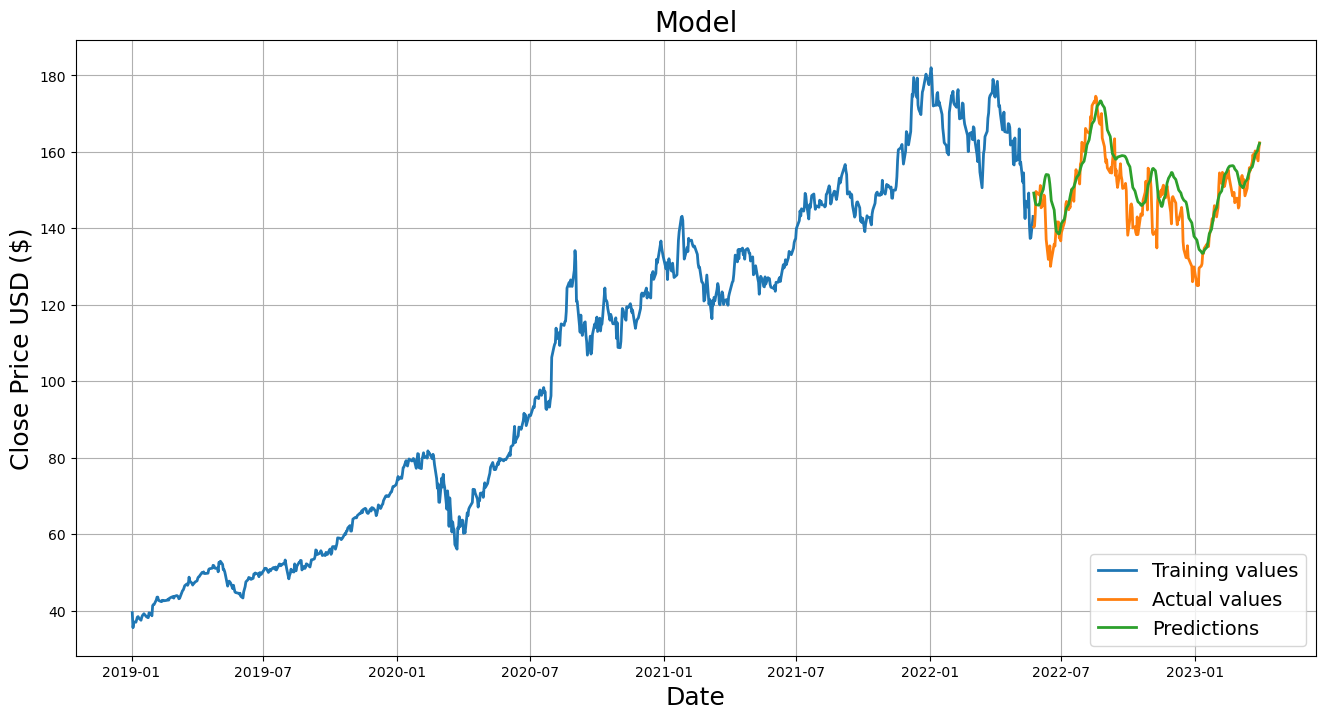

In [14]:
# Plot the training and validation datasets, as well as the predicted values
plt.figure(figsize=(16,8))
plt.title('Model', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'], linewidth=2)
plt.plot(valid['Close'], linewidth=2)
plt.plot(valid['Predictions'], linewidth=2)
plt.legend(['Training values', 'Actual values', 'Predictions'], fontsize=14, loc='lower right')
plt.grid(True)
plt.show

In [15]:
# Select the last 60 closing prices from the 'Close' column and reshape the array to have a single feature
last_60_days = df['Close'][-60:].values.reshape(-1,1)

# Scale the data using the same scaler used on the training and testing data
last_60_days_scaled = scaler.transform(last_60_days)

# Predict the scaled price for the next day using the LSTM model
predicted_price_scaled_tomorrow = model.predict(np.array([last_60_days_scaled]))

# Reverse the scaling to get the predicted price in dollars.
predicted_price_tomorrow = scaler.inverse_transform(predicted_price_scaled_tomorrow)

In [17]:
# Print the predicted price for the next day and next week
tomorrow = datetime.date.today() + datetime.timedelta(days=1)

print(f"The predicted closing price for tomorrow ({tomorrow}) is: {round(float(predicted_price_tomorrow), 2)} $")

The predicted closing price for tomorrow (2023-04-01) is: 162.62 $ with an accuracy of 94.66%
